<center><br><br><br><h1>Age and Gender Prediction System</h1><br><br><br></center>

# Import Libraries

In [1]:
# Import Libraries

import os
import cv2
import numpy as np
import pandas as pd
import tkinter as tk
from tqdm import tqdm
import seaborn as sns
import tensorflow as tf
from tkinter import filedialog
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D

# Load Dataset

In [2]:
# Give Path of Dataset

path="Dataset/Faces"

In [3]:
# Load all the Files From Dataset Path

files=os.listdir(path)

# Pre-Process Dataset

In [4]:
# Save ages of all Images
ages=[]

# Save genders of all Images
genders=[]

# Save all Images
images=[]

# Read all Files one by one
for file in tqdm(files):
    
    # Split file name to get age
    age = int(file.split('_')[0])
    
    # Split file name to get gender
    gender = int(file.split('_')[1])
    total=path+'/'+file
    
    # Read Image
    image=cv2.imread(total)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize Image
    image= cv2.resize(image,(48,48))
    
    # Append Image to Images List
    images.append(image)

100%|███████████████████████████████████████████████████████████████████████████| 23708/23708 [03:02<00:00, 129.73it/s]


In [5]:
for file in tqdm(files):
    age = int(file.split('_')[0])
    gender=int(file.split('_')[1])
    
    # Append age to ages list
    ages.append(age)
    
    # Append gender to genders list
    genders.append(gender)

100%|████████████████████████████████████████████████████████████████████████| 23708/23708 [00:00<00:00, 758574.98it/s]


# View some Images from Dataset

In [6]:
# Convert Lists to Arrays

images = np.array(images)
genders = np.array(genders)
ages = np.array(ages)

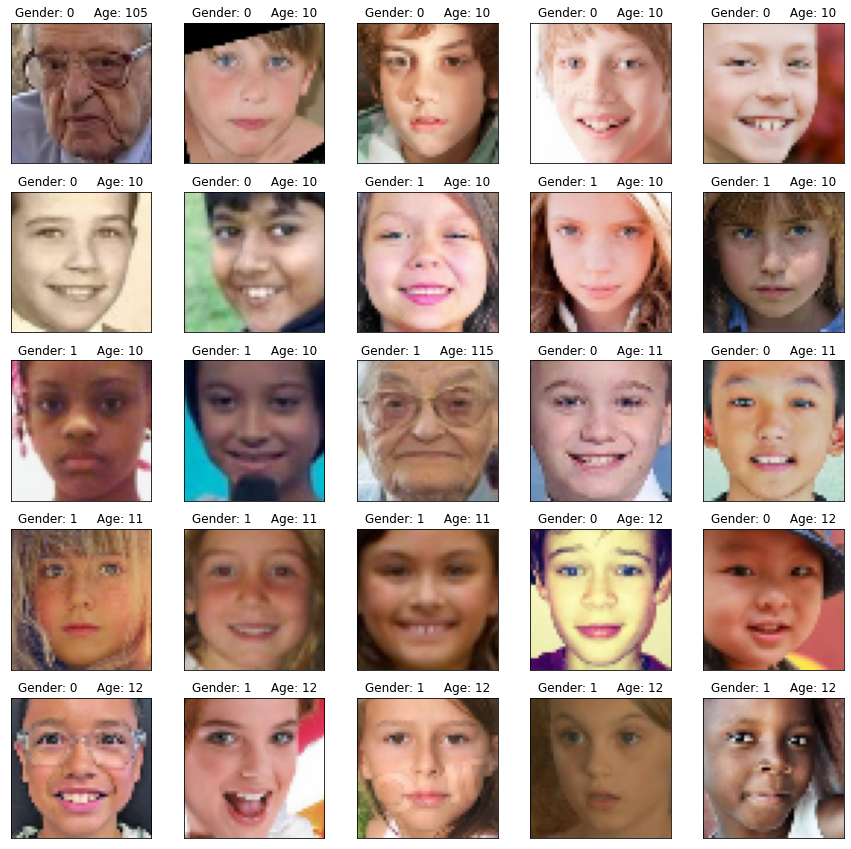

In [7]:
# Show some Images

w=20
h=20
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 5

for i in range(1, columns*rows +1):
    img = images[i * 14]
    fig.add_subplot(rows, columns, i)
    
    # Show Images
    plt.imshow(img)
    
    # Set Title of each Image
    title = "Gender: " + str(genders[i * 14]) + "     Age: " + str(ages[i * 14])
    plt.title(title,color="black")
    plt.imshow(img)
    plt.xticks([]),  plt.yticks([])

# Plot by Gender

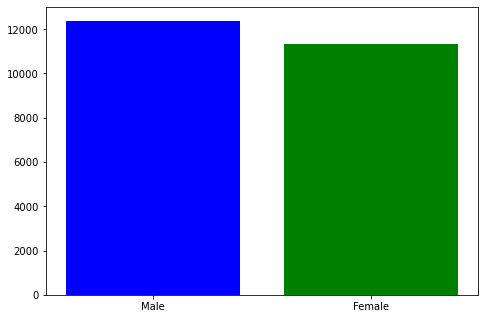

In [8]:
# Plot Male and Female

# Conut Values 
values, counts = np.unique(genders, return_counts=True)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=counts

# Plot Bars
ax.bar(gender,values,color = ['Blue','Green'])
plt.show()

# Plot by Age

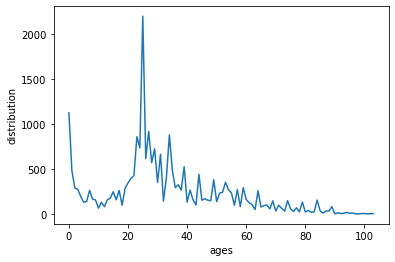

In [9]:
# Plot Ages

# Count by Age
values, counts = np.unique(ages, return_counts=True)

# Plot
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

# Output Labels

In [10]:
# Create a list of Output Labels
labels=[]
i=0
while i<len(ages):
    label=[]
    
    # Append Ages to Label
    label.append([ages[i]])
    
    # Append Genders to Label
    label.append([genders[i]])
    labels.append(label)
    i+=1
    
# Convert Labels to List
labels_2 = np.array(labels)

# Input Vector

In [11]:
# Divide all images by 255 for Normalization

images_2 = images/255

# Split Data in Traing and Testing

In [12]:
# Split data into Training Data and Testing Data with 80,20 ratio

X_train, X_test, Y_train, Y_test= train_test_split(images_2, labels_2, test_size=0.2, random_state = 42)

In [13]:
Y_train_2 = [Y_train[:,1],Y_train[:,0]]
Y_test_2 = [Y_test[:,1],Y_test[:,0]]

# Build TensorFlow Model

In [14]:
# Build Tensorfolw model

def Convolution(input_tensor,filters):
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)
    return x

def model(input_shape):
    # Set Input Shape
    inputs = Input((input_shape))
    
    # Add Layers
    conv_1= Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
    flatten= Flatten() (maxp_4)
    dense_1= Dense(64,activation='relu')(flatten)
    dense_2= Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    
    # Add Layer for Output of Gender
    output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)
    
    # Add Layer for Output of Age
    output_2= Dense(1,activation="relu",name='age_out')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1,output_2])
    
    # Complie Model and Set Metrics as Accuracy
    model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
    metrics=["accuracy"])
    
    # Return Model
    return model

In [15]:
Model=model((48,48,3))

In [16]:
# Show Model Summary

Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

# Model Training

In [17]:
# Train the model and save it with h5 extension

file_save='Age_Gender_Prediction_Model.h5'
checkpointer = ModelCheckpoint(file_save, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [18]:
# Fit model of Training data and validate it on Testing data
# We execute 25 epochs

History = Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=25,callbacks=[callback_list])

Epoch 1/25
297/297 [==============================] - 85s 282ms/step - loss: 18.5757 - sex_out_loss: 0.7031 - age_out_loss: 17.6828 - sex_out_accuracy: 0.5351 - age_out_accuracy: 0.0451 - val_loss: 18.5266 - val_sex_out_loss: 0.6923 - val_age_out_loss: 17.6916 - val_sex_out_accuracy: 0.5240 - val_age_out_accuracy: 0.0458

Epoch 00001: val_loss improved from inf to 18.52664, saving model to Age_Gender_Prediction_Model.h5
Epoch 2/25
297/297 [==============================] - 88s 295ms/step - loss: 14.8689 - sex_out_loss: 0.6920 - age_out_loss: 14.0213 - sex_out_accuracy: 0.5204 - age_out_accuracy: 0.0456 - val_loss: 13.1589 - val_sex_out_loss: 0.6433 - val_age_out_loss: 12.2786 - val_sex_out_accuracy: 0.5240 - val_age_out_accuracy: 0.0458

Epoch 00002: val_loss improved from 18.52664 to 13.15887, saving model to Age_Gender_Prediction_Model.h5
Epoch 3/25
297/297 [==============================] - 95s 319ms/step - loss: 11.4535 - sex_out_loss: 0.6408 - age_out_loss: 10.5637 - sex_out_accur

297/297 [==============================] - 113s 380ms/step - loss: 7.0063 - sex_out_loss: 0.2707 - age_out_loss: 6.1723 - sex_out_accuracy: 0.8735 - age_out_accuracy: 0.0477 - val_loss: 8.5130 - val_sex_out_loss: 0.2656 - val_age_out_loss: 7.6761 - val_sex_out_accuracy: 0.8863 - val_age_out_accuracy: 0.0458

Epoch 00022: val_loss did not improve from 8.35095
Epoch 23/25
297/297 [==============================] - 115s 386ms/step - loss: 6.9640 - sex_out_loss: 0.2581 - age_out_loss: 6.1307 - sex_out_accuracy: 0.8801 - age_out_accuracy: 0.0473 - val_loss: 8.3102 - val_sex_out_loss: 0.2635 - val_age_out_loss: 7.4611 - val_sex_out_accuracy: 0.8846 - val_age_out_accuracy: 0.0458

Epoch 00023: val_loss improved from 8.35095 to 8.31024, saving model to Age_Gender_Prediction_Model.h5
Epoch 24/25
297/297 [==============================] - 114s 385ms/step - loss: 6.9883 - sex_out_loss: 0.2590 - age_out_loss: 6.1407 - sex_out_accuracy: 0.8720 - age_out_accuracy: 0.0464 - val_loss: 7.4180 - val_sex

# Model Evaluation

In [19]:
# Evalute the Trained Model on Testing Data

Model.evaluate(X_test,Y_test_2)

149/149 [==============================] - 6s 41ms/step - loss: 8.2364 - sex_out_loss: 0.2748 - age_out_loss: 7.3536 - sex_out_accuracy: 0.8699 - age_out_accuracy: 0.0458


[8.23641586303711,
 0.274760901927948,
 7.3535685539245605,
 0.8698861002922058,
 0.04576128348708153]

# Model Predictions

In [20]:
# Get predictions on test data from Trained Model

pred=Model.predict(X_test)

# Plot Loss

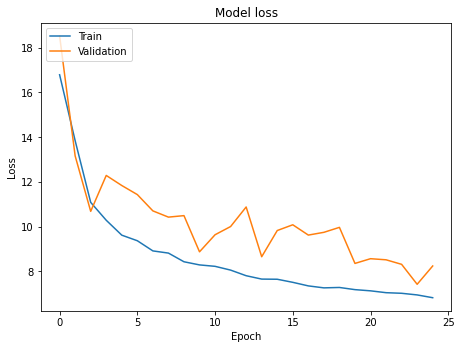

In [21]:
# Plot the Model Loss on Training Data and Validation Data

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

# Model Accuracy

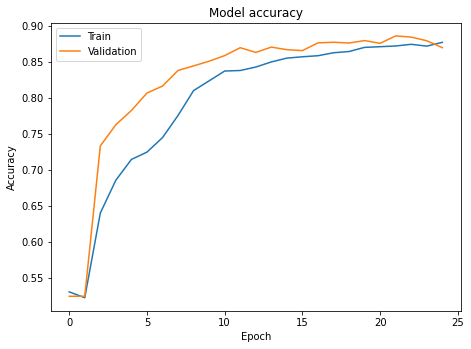

In [22]:
# Plot Model Validation Accuracy and Training Accuracy

plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

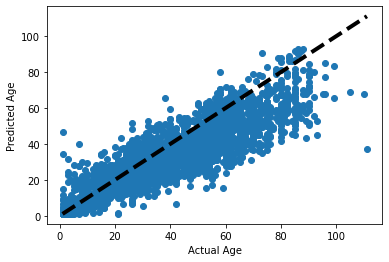

In [23]:
# Plot Actual and Predicted Ages

fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

# Confusion Matrix

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      2485
           1       0.81      0.95      0.87      2257

    accuracy                           0.87      4742
   macro avg       0.88      0.87      0.87      4742
weighted avg       0.88      0.87      0.87      4742



<AxesSubplot:>

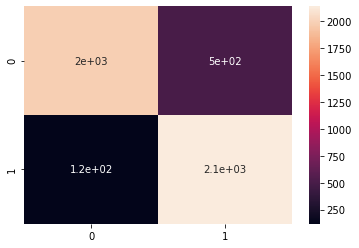

In [24]:
# Show Confusion Matrix

i=0
Pred_label=[]
while(i<len(pred[0])):
    Pred_label.append(int(np.round(pred[0][i])))
    i+=1
    
# Get Classification Report
report=classification_report(Y_test_2[0], Pred_label)
print(report)
results = confusion_matrix(Y_test_2[0], Pred_label)

# Show Classification report as Heatmap
sns.heatmap(results, annot=True)

# Predictions on Unseen Data

In [25]:
# Fuction to predict age and gender of unseen Image

def test_image(ind,images,images_2,Model):
    
    # Show image
    plt.imshow(images[ind])
    image_test = images_2[ind]
    
    # Get Prediction by Model
    pred_lab = Model.predict(np.array([image_test]))
    gender_list = ['Male','Female']
    age = int(np.round(pred_lab[1][0]))
    gender = int(np.round(pred_lab[0][0]))
    
    # Print Age and Gender
    print("Predicted Age: "+ str(age))
    print("Predicted Gender: "+ gender_list[gender])

Predicted Age: 5
Predicted Gender: Male


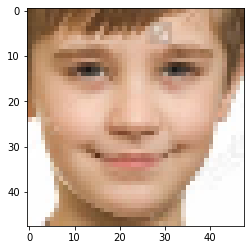

In [26]:
test_image(66,images,images_2,Model)

Predicted Age: 7
Predicted Gender: Female


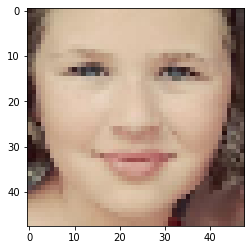

In [27]:
test_image(137,images,images_2,Model)

Predicted Age: 18
Predicted Gender: Male


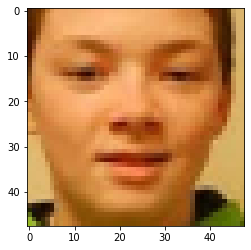

In [28]:
test_image(502,images,images_2,Model)

# Application Phase



 Predicted Age: 27
 Predicted Gender: Male
 Suggested Activity: Start Planning Your Family


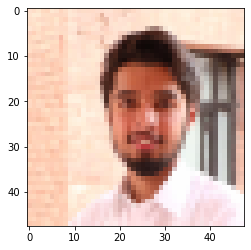

In [29]:
# Open Tinkter Window
application_window = tk.Tk()
my_filetypes = [('all files', '.*'), ('text files', '.txt')]

# Allow user to select an Image for your PC
user_file = filedialog.askopenfilename(parent=application_window,
                                    initialdir=os.getcwd(),
                                    title="Please select an Image to detect gender:",
                                    filetypes=my_filetypes)
# Close Tinkter Window
application_window.destroy()

# Read Selected Image
unseen_bgr_image=cv2.cvtColor(cv2.imread(user_file), cv2.COLOR_BGR2RGB)

# Resize Image
resized = cv2.resize(unseen_bgr_image, (48,48), interpolation = cv2.INTER_AREA)

# Normalize Image
img_preprocess = resized/255

# Show Image
plt.imshow(resized)

# Get  Prediction By Model
pred_lab=Model.predict(np.array([img_preprocess]))
gender_list = ['Male','Female']
age = int(np.round(pred_lab[1][0]))
gender = int(np.round(pred_lab[0][0]))

# Read Activites
activites = pd.read_csv('Dataset/Activites.csv')

# Suggest an Activity
suggested_activity = activites.iloc[int(age/5)]

# Print age
print("\n\n Predicted Age: " + str(age))

# Print Gender
print(" Predicted Gender: " + gender_list[gender])

# Print Suggested Activity
print(" Suggested Activity: " + suggested_activity[0])

<center><br><br><br><h1>Thank you so much</h1><br><br><br></center>